In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [80]:
train = pd.read_csv("../train.csv")

In [81]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [82]:
finger = train.drop(columns=["keyword","location","id"])

Uso expresiones regulares para hallar menciones, etiquetas y URLs en los tweets.

In [83]:
def hashtags(x): 
    return re.findall(r'#[a-zA-z0-9_]{1,}',x)
def arrobas(x):
    return re.findall(r'@[a-zA-z0-9_]{1,}',x)
def urls(x):
    return re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)
    
    
train[["Menciones","Etiquetas","Enlaces"]] =\
                        train["text"].apply(lambda x: pd.Series([arrobas(x),hashtags(x),urls(x)]))

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
id           7613 non-null int64
keyword      7552 non-null object
location     5080 non-null object
text         7613 non-null object
target       7613 non-null int64
Menciones    7613 non-null object
Etiquetas    7613 non-null object
Enlaces      7613 non-null object
dtypes: int64(2), object(6)
memory usage: 475.9+ KB


In [87]:
train["Enlaces"].em

False

In [62]:
def non_alphanum(x):
    return len(re.findall(r'[^a-zA-Z0-9 ]',x))
def hashtags(x): 
    return len(re.findall(r'#[a-zA-z0-9_]',x))
def arrobas(x):
    return len(re.findall(r'@[a-zA-z0-9_]',x))
def expresion(x):
    return (x.count('?') + x.count('!'))
def urls(x):
    re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
finger[["Caracteres","Palabras",\
            "Caracteres no alfanuméricos","Caracteres de expresión !?",\
                "Etiquetas", "Menciones"]] \
= finger["text"].apply(lambda x: pd.Series([len(x),len(x.split(" "))\
                                    ,non_alphanum(x),expresion(x)
                                            ,hashtags(x),arrobas(x)]))

finger["Caracteres no alfanuméricos"] = \
finger["Caracteres no alfanuméricos"] - finger["Etiquetas"] \
                                        - finger["Menciones"]

finger.drop(columns=["text"],inplace=True)
finger.head()

,target,Caracteres,Palabras,Caracteres no alfanuméricos,Caracteres de expresión !?,Etiquetas,Menciones
0,1,69,13,0,0,1,0
1,1,38,7,1,0,0,0
2,1,133,22,3,0,0,0
3,1,65,9,1,0,1,0
4,1,88,17,0,0,2,0


Text(0, 0.5, '')

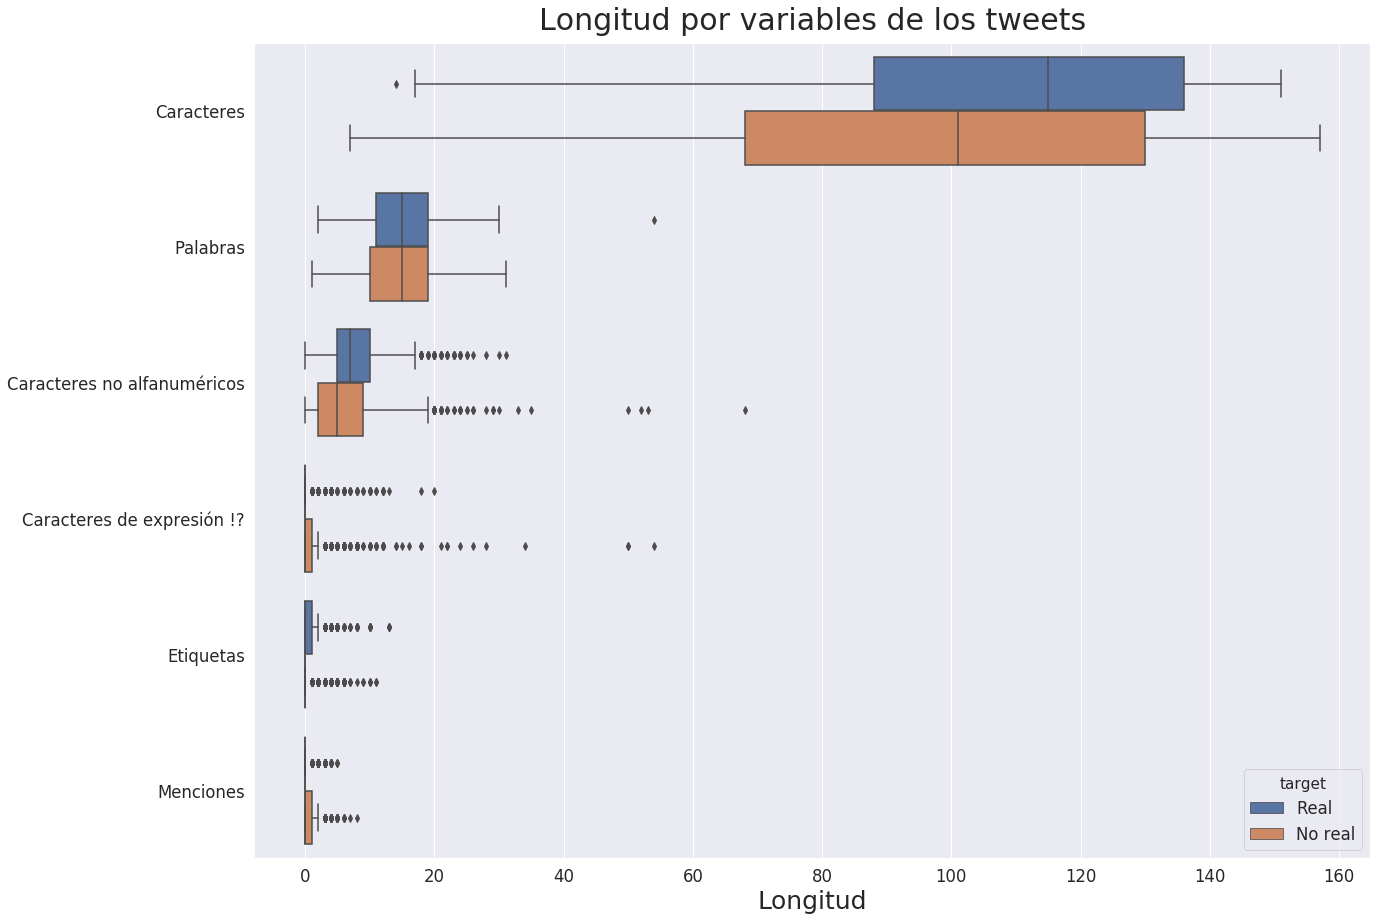

In [63]:
melted = pd.melt(finger, id_vars="target")
melted.loc[melted["target"] == 0, "target"] = "No real"
melted.loc[melted["target"] == 1, "target"] = "Real"
melted.rename(columns={"value":"Longitud","variable":"Variables"},inplace=True)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=1.5)
plot = sns.boxplot(x='Longitud',y="Variables",data=melted,hue='target')
plot.axes.set_title('Longitud por variables de los tweets',fontsize=30, y=1.009)
plot.set_xlabel("Longitud",fontsize=25)
plot.set_ylabel("",fontsize=0)
#plot.get_figure().savefig("finger.png")

In [64]:
serie = train.loc[~train['location'].isna(),'location'].value_counts()
print (serie.sum())
serie.loc[serie > 2].sum()

5080


1730